In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("churn.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [6]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
label_encoder = LabelEncoder()

In [9]:
df['gender'] = label_encoder.fit_transform(df['gender'])

In [10]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dummies =pd.get_dummies(df['country'])
df = df.drop('country', axis=1)

In [12]:
encoded_Data = pd.concat([df,dummies],axis=1)
encoded_Data.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [13]:
cols_for_scaling = ['credit_score','age','tenure','balance','products_number','estimated_salary']

In [14]:
cols_for_sc = encoded_Data[cols_for_scaling]

In [15]:
scaler = StandardScaler()
X1 = scaler.fit_transform(cols_for_sc)

In [16]:
encoded_Data['credit_score'] = X1[:,0]
encoded_Data['age'] = X1[:,1]
encoded_Data['tenure'] = X1[:,2]
encoded_Data['balance'] = X1[:,3]
encoded_Data['products_number'] = X1[:,4]
encoded_Data['estimated_salary'] = X1[:,5]

In [17]:
encoded_Data.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,True,False,False
1,15647311,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,False,True
2,15619304,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,True,False,False
3,15701354,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,True,False,False
4,15737888,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,False,True


## SMOTE Technique for Class Imbalance

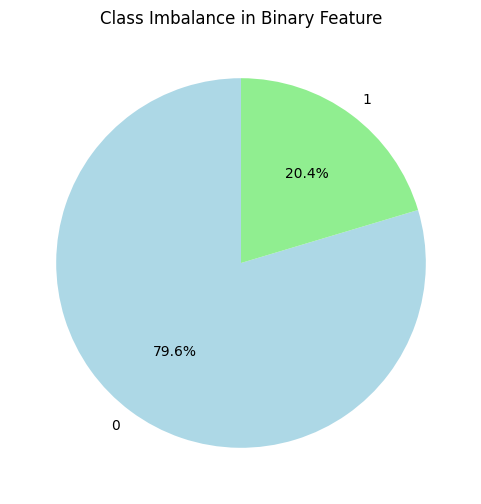

In [18]:
class_counts = df['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Class Imbalance in Binary Feature')
plt.show()

In [19]:
X = encoded_Data.drop('churn', axis=1)
y = encoded_Data['churn']

In [20]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [21]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['churn'] = y_resampled

In [22]:
print("Original dataset class distribution:\n", y.value_counts())
print("\nResampled dataset class distribution:\n", y_resampled.value_counts())

Original dataset class distribution:
 churn
0    7963
1    2037
Name: count, dtype: int64

Resampled dataset class distribution:
 churn
1    7963
0    7963
Name: count, dtype: int64


In [23]:
df_resampled.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany,Spain,churn
0,15634602,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,True,False,False,1
1,15647311,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,False,False,True,0
2,15619304,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,True,False,False,1
3,15701354,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,True,False,False,0
4,15737888,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,False,False,True,0


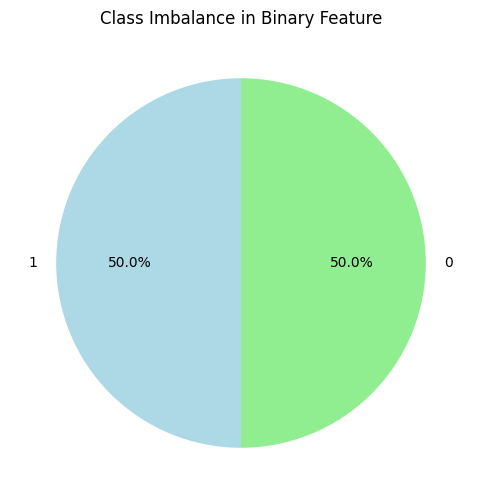

In [24]:
class_counts = df_resampled['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Class Imbalance in Binary Feature')
plt.show()

# Model Training

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_curve,roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree, export_text
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

In [26]:
name = []
accuracy = []
precision = []
recall = []
f1 = []

In [27]:
X = df_resampled.drop(['customer_id','churn'], axis=1)
y = df_resampled['churn']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print(X_train.shape)

(12740, 12)


## Logistic Regression

In [30]:
model_lr = LogisticRegression(penalty='l2', C=1)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

In [31]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_lr*100,precision_lr*100, recall_lr*100, f1_lr*100]}
df_lr = pd.DataFrame(measure)
df_lr

,Metric,Score
0,Accuracy,83.207784
1,Precision,85.347222
2,Recall,79.137154
3,F1 Score,82.124958


In [32]:
name.append('Logistic Regression')
accuracy.append(accuracy_lr)
precision.append(precision_lr)
recall.append(recall_lr)
f1.append(f1_lr)

## Random Forest

In [33]:
model_rf = RandomForestClassifier(max_depth=20,random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)


In [34]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_rf*100,precision_rf*100, recall_rf*100, f1_rf*100]}
df_rf = pd.DataFrame(measure)
df_rf

,Metric,Score
0,Accuracy,90.332706
1,Precision,92.203390
2,Recall,87.572440
3,F1 Score,89.828269


In [35]:
name.append('Random Forest')
accuracy.append(accuracy_rf)
precision.append(precision_rf)
recall.append(recall_rf)
f1.append(f1_rf)

## KNN

In [36]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)


In [37]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_knn*100,precision_knn*100, recall_knn*100, f1_knn*100]}
df_knn = pd.DataFrame(measure)
df_knn

,Metric,Score
0,Accuracy,86.001255
1,Precision,85.458040
2,Recall,85.898261
3,F1 Score,85.677585


In [38]:
name.append('KNN')
accuracy.append(accuracy_knn)
precision.append(precision_knn)
recall.append(recall_knn)
f1.append(f1_knn)

## Gaussian NB

In [39]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)

In [40]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_gnb*100,precision_gnb*100, recall_gnb*100, f1_gnb*100]}
df_gnb = pd.DataFrame(measure)
df_gnb

,Metric,Score
0,Accuracy,82.140615
1,Precision,81.906615
2,Recall,81.326465
3,F1 Score,81.615509


In [41]:
name.append('GaussianNB')
accuracy.append(accuracy_gnb)
precision.append(precision_gnb)
recall.append(recall_gnb)
f1.append(f1_gnb)

## SVC

In [42]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)

In [43]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_svc*100,precision_svc*100, recall_svc*100, f1_svc*100]}
df_svc = pd.DataFrame(measure)
df_svc

,Metric,Score
0,Accuracy,88.041431
1,Precision,91.036415
2,Recall,83.708950
3,F1 Score,87.219054


In [44]:
name.append('SVC')
accuracy.append(accuracy_svc)
precision.append(precision_svc)
recall.append(recall_svc)
f1.append(f1_svc)

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [46]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

dt_grid = GridSearchCV(dt, param_grid, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)


In [47]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_dt*100,precision_dt*100, recall_dt*100, f1_dt*100]}
df_dt = pd.DataFrame(measure)
df_dt

,Metric,Score
0,Accuracy,86.691777
1,Precision,87.809779
2,Recall,84.417257
3,F1 Score,86.080105


In [48]:
name.append('Decision Tree')
accuracy.append(accuracy_dt)
precision.append(precision_dt)
recall.append(recall_dt)
f1.append(f1_dt)

In [49]:
print(name)
print(accuracy)
print(precision)
print(recall)
print(f1)

['Logistic Regression', 'Random Forest', 'KNN', 'GaussianNB', 'SVC', 'Decision Tree']
[0.8320778405524168, 0.9033270558694287, 0.8600125549278091, 0.8214061519146265, 0.8804143126177024, 0.86691776522285]
[0.8534722222222222, 0.9220338983050848, 0.8545803971812941, 0.8190661478599222, 0.9103641456582633, 0.8780977896851976]
[0.7913715389568577, 0.875724404378622, 0.8589826142949131, 0.8132646490663232, 0.8370895041854475, 0.8441725692208628]
[0.8212495823588373, 0.8982826948480845, 0.8567758509955041, 0.8161550888529887, 0.8721905400872191, 0.860801050558109]


# ANN

In [50]:
import tensorflow as tf
from tensorflow import keras

X_train_nn = np.array(X_train, dtype=np.float32)
X_test_nn = np.array(X_test, dtype=np.float32)
y_train_nn = np.array(y_train, dtype=np.float32)
y_test_nn = np.array(y_test, dtype=np.float32)


model = keras.Sequential([
    keras.layers.Input(shape=(X_train_nn.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_nn, y_train_nn, epochs=150, batch_size=16, validation_split=0.3, verbose=1)


_, accuracy_nn = model.evaluate(X_test_nn, y_test_nn, verbose=1)
print("Accuracy : ", accuracy_nn)

Epoch 1/150
558/558 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7672 - loss: 0.4885 - val_accuracy: 0.8503 - val_loss: 0.3479
Epoch 2/150
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8588 - loss: 0.3274 - val_accuracy: 0.8577 - val_loss: 0.3200
Epoch 3/150
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8659 - loss: 0.3081 - val_accuracy: 0.8590 - val_loss: 0.3121
Epoch 4/150
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8715 - loss: 0.2995 - val_accuracy: 0.8611 - val_loss: 0.3048
Epoch 5/150
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8708 - loss: 0.2928 - val_accuracy: 0.8645 - val_loss: 0.3071
Epoch 6/150
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8829 - loss: 0.2658 - val_accuracy: 0.8637 - val_loss: 0.2940
Epoch 7/150
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8811 - loss: 0.2682 - val_accuracy: 0.8668 - val_loss: 0.2983
Epoch 8/150
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8890 - loss: 0.2643 - val_accu

In [51]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_nn = model.predict(X_test_nn, verbose=0)

y_pred_binary = (y_pred_nn > 0.5).astype(int)

precision_nn = precision_score(y_test_nn, y_pred_binary)
recall_nn = recall_score(y_test_nn, y_pred_binary)
f1_nn = f1_score(y_test_nn, y_pred_binary)

print("Precision: ", precision_nn)
print("Recall: ", recall_nn)
print("F1 Score: ", f1_nn)

Precision:  0.8484472049689441
Recall:  0.8795878943979395
F1 Score:  0.8637369585836231


In [52]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_nn*100,precision_nn*100, recall_nn*100, f1_nn*100]}
df_nn = pd.DataFrame(measure)
df_nn

,Metric,Score
0,Accuracy,86.472064
1,Precision,84.844720
2,Recall,87.958789
3,F1 Score,86.373696


In [53]:
name.append('Neural Network')
accuracy.append(accuracy_nn)
precision.append(precision_nn)
recall.append(recall_nn)
f1.append(f1_nn)

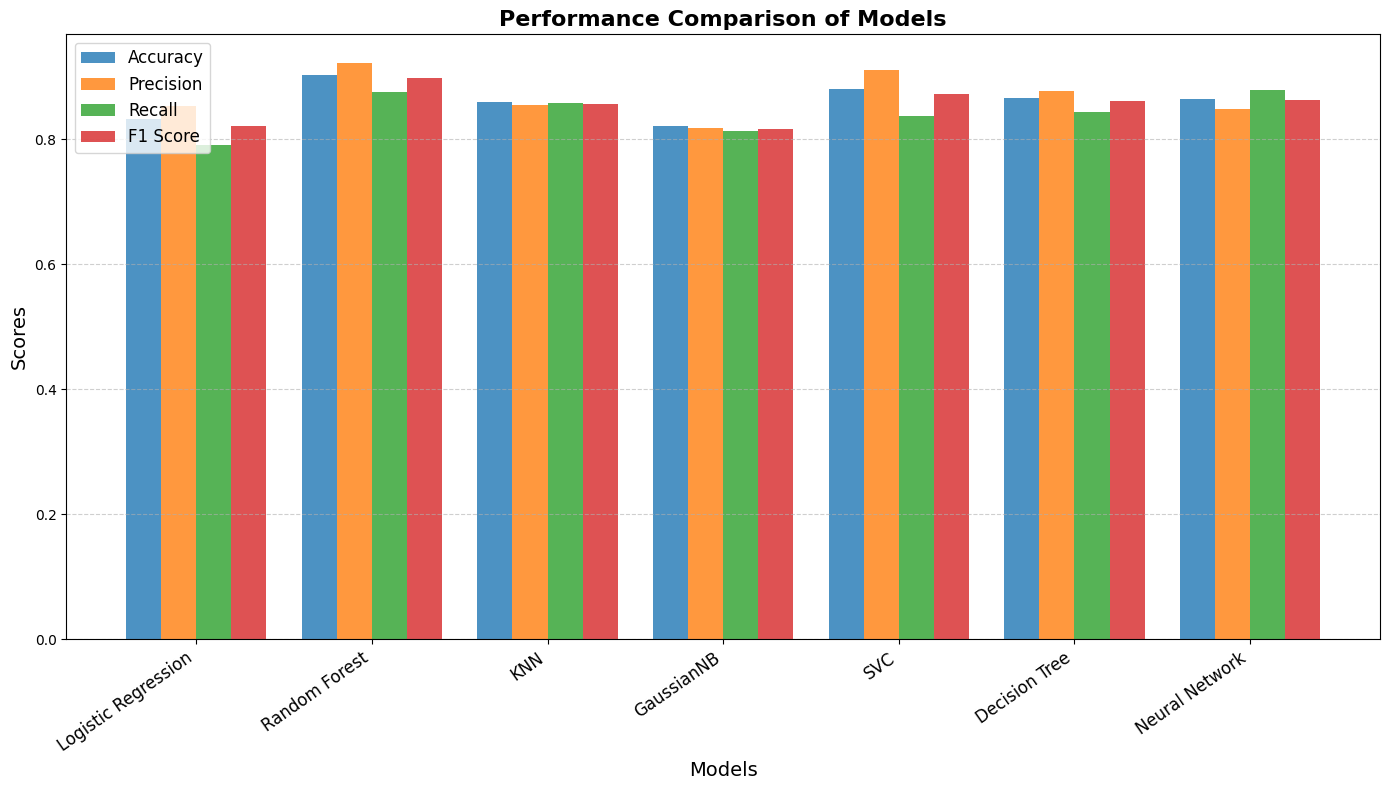


Model Performance Summary:
              Model  Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.832078   0.853472 0.791372  0.821250
      Random Forest  0.903327   0.922034 0.875724  0.898283
                KNN  0.860013   0.854580 0.858983  0.856776
         GaussianNB  0.821406   0.819066 0.813265  0.816155
                SVC  0.880414   0.910364 0.837090  0.872191
      Decision Tree  0.866918   0.878098 0.844173  0.860801
     Neural Network  0.864721   0.848447 0.879588  0.863737


In [54]:
import matplotlib.pyplot as plt
import numpy as np


metrics_df = pd.DataFrame({
    'Model': name,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})


bar_width = 0.2
index = np.arange(len(name))

fig, ax = plt.subplots(figsize=(14, 8))

#
plt.bar(index, accuracy, bar_width, label='Accuracy', color='#1f77b4', alpha=0.8)
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='#ff7f0e', alpha=0.8)
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='#2ca02c', alpha=0.8)
plt.bar(index + 3 * bar_width, f1, bar_width, label='F1 Score', color='#d62728', alpha=0.8)


ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(name, rotation=35, ha='right', fontsize=12)

ax.grid(True, axis='y', linestyle='--', alpha=0.6)


plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance Comparison of Models', fontsize=16, fontweight='bold')


plt.legend(loc='upper left', fontsize=12)


plt.tight_layout()


plt.show()

print("\nModel Performance Summary:")
print(metrics_df.to_string(index=False))